In [105]:
import pandas as pd
import geopandas as gp
import glob
import os
import matplotlib.pylab as plt
import seaborn as sns

workingFolder = r"C:\Users\a0777676\OneDrive - Aon\Desktop\dataIncubatorTest\dinsRaster"


In [211]:
# importing the DINS data for different fire events

os.chdir(workingFolder)
dinsfn = glob.glob("*.shp")
dins = None
for i in range(0, len(dinsfn)):
    #print(dinsfn[i])
    dinsTemp = gp.GeoDataFrame.from_file(dinsfn[i])
    dins = pd.concat([dins, dinsTemp],ignore_index = True)
    print(dinsfn[i],dins.crs )


Bear2020+.shp {'init': 'epsg:4326'}


C:\Users\a0777676\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Camp2018.shp {'init': 'epsg:4326'}
Kincade2019.shp {'init': 'epsg:4326'}
Lake2020.shp {'init': 'epsg:4326'}
LNU2020.shp {'init': 'epsg:4326'}


In [218]:
dins.head()

,APN,AerialRevi,CALFIREUNI,CITY,CREATEDDAT,County_Sit,DAMAGE,DECKPORCHE,DECKPORCHO,DINS_Damag,...,STRUCTUREC,STRUCTURET,VENTSCREEN,WINDOWPANE,ZIPCODE,geometry,slp,str,whp,damageRatio
0,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Masonry/Concrete,NaN,...,NaN,Commercial Building Single Story,"Mesh Screen <= 1/8""",Single Pane,NaN,POINT (-120.83429 39.92372),NaN,2.38151,3949,0
1,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Masonry/Concrete,NaN,...,NaN,Commercial Building Single Story,"Mesh Screen <= 1/8""",Single Pane,NaN,POINT (-120.83417 39.92363),NaN,2.38151,3949,0
2,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Masonry/Concrete,NaN,...,NaN,Single Family Residence Multi Story,"Mesh Screen > 1/8""",Multi Pane,NaN,POINT (-120.85595 39.91694),NaN,4.94472,2226,0
3,NaN,NaN,LMU,NA,NaN,NaN,No Damage,Wood,No Deck/Porch,NaN,...,NaN,Single Family Residence Multi Story,"Mesh Screen <= 1/8""",Multi Pane,NaN,POINT (-120.85713 39.91916),NaN,3.37111,8646,0
4,NaN,NaN,LMU,NA,NaN,NaN,No Damage,No Deck/Porch,Wood,NaN,...,NaN,Utility Misc Structure,No Vents,Multi Pane,NaN,POINT (-120.85718 39.91940),NaN,3.37111,8646,0


In [215]:
dins['damageRatio'] = 0
dins.at[dins['DAMAGE'] == 'No Damage', 'damageRatio'] = 0
dins.at[dins['DAMAGE'] == 'Affected (1-9%)', 'damageRatio'] = 9
dins.at[dins['DAMAGE'] == 'Minor (10-25%)', 'damageRatio'] = 25
dins.at[dins['DAMAGE'] == 'Major (26-50%)', 'damageRatio'] = 50
dins.at[dins['DAMAGE'] == 'Destroyed (>50%)', 'damageRatio'] = 100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

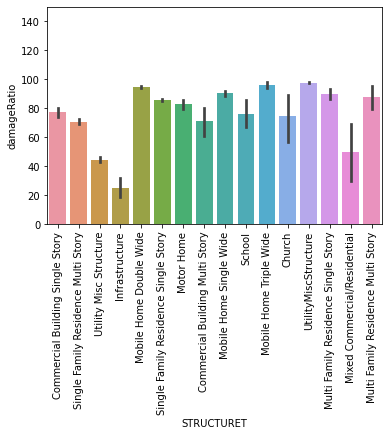

In [216]:
#damage ratio for different types of structures
ax = sns.barplot(x='STRUCTURET', y="damageRatio", data=dins)#, order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(ylim=(0, 150))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

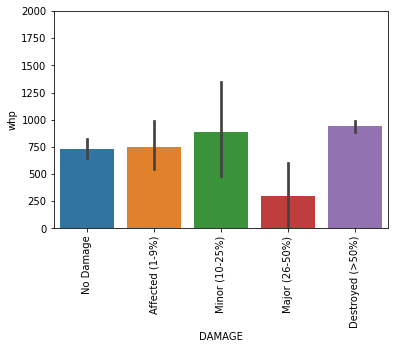

In [217]:
# comparing damage ratio for a single familyt versus versus structure densitty
ax = sns.barplot(x="DAMAGE", y="whp", data=dins[dins['STRUCTURET']=='Single Family Residence Multi Story'], order=["No Damage", "Affected (1-9%)", "Minor (10-25%)", "Major (26-50%)", "Destroyed (>50%)"])
ax.set(ylim=(0, 2000))
plt.xticks(rotation=90)